<a href="https://colab.research.google.com/github/classic-21/Small-Image-Classification/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

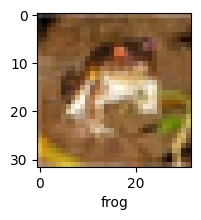

In [ ]:
plot_sample(X_train, y_train, 0)

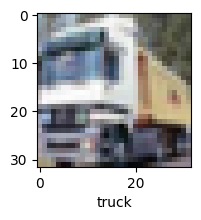

In [ ]:
plot_sample(X_train, y_train, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
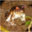

In [ ]:
X_train[0]

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1800, activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2967 - loss: 1.9434
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4132 - loss: 1.6607
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4509 - loss: 1.5599
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4700 - loss: 1.4992
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4954 - loss: 1.4406


In [ ]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4774 - loss: 1.4867


[1.4898250102996826, 0.4715999960899353]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_labels = [classes[np.argmax(element)] for element in y_pred]
print("Classification Report is:\n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report is:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57      1000
           1       0.49      0.70      0.58      1000
           2       0.47      0.20      0.27      1000
           3       0.42      0.12      0.19      1000
           4       0.44      0.40      0.42      1000
           5       0.36      0.45      0.40      1000
           6       0.56      0.51      0.53      1000
           7       0.42      0.68      0.51      1000
           8       0.69      0.48      0.56      1000
           9       0.41      0.64      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000



In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3810 - loss: 1.6954
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6028 - loss: 1.1343
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6555 - loss: 0.9931
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6845 - loss: 0.9128
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7058 - loss: 0.8482
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7230 - loss: 0.7904
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7398 - loss: 0.7457
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7558 - loss: 0.7077
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7679 - loss: 0.6687
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7776 - loss: 0.6388


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7088 - loss: 0.8940


[0.9053276181221008, 0.704200029373169]

In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(5,5), activation="relu"),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(300, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3636 - loss: 1.7235
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5961 - loss: 1.1397
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6579 - loss: 0.9725
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7003 - loss: 0.8592
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7344 - loss: 0.7573
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7649 - loss: 0.6700
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7895 - loss: 0.5988
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8179 - loss: 0.5243
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8404 - loss: 0.4527
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8689 - loss: 0.3783


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7009 - loss: 1.0657


[1.0960644483566284, 0.6952000260353088]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.99662638e-04, 5.36625739e-04, 5.93514042e-03, 9.39839065e-01,
        3.69244162e-06, 8.45362805e-03, 3.99171934e-02, 6.42005534e-06,
        5.01025422e-03, 9.83461650e-05],
       [1.33836186e-02, 3.07437897e-01, 1.00317976e-10, 3.73660569e-09,
        3.79384718e-10, 2.71981795e-11, 1.64842071e-10, 7.70075059e-10,
        6.79122925e-01, 5.55717234e-05],
       [1.96282137e-02, 2.32998896e-02, 5.50625962e-04, 1.07922952e-03,
        3.94401286e-04, 5.41152549e-05, 7.75872322e-04, 1.30277360e-04,
        9.51204538e-01, 2.88287620e-03],
       [8.73014450e-01, 7.06836930e-04, 2.68112146e-03, 4.21004277e-03,
        4.00585961e-03, 5.09499921e-04, 4.12764791e-07, 4.92044957e-04,
        1.12438180e-01, 1.94162375e-03],
       [5.01945046e-08, 1.39302920e-05, 4.34949584e-02, 5.98104578e-03,
        4.88571644e-01, 2.79508270e-02, 4.33984697e-01, 1.40724637e-06,
        7.00023975e-07, 8.34859975e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
classes[y_test[0]]

'cat'

In [ ]:
print("Classification Report:\n", classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.75      1000
           1       0.80      0.84      0.82      1000
           2       0.63      0.54      0.58      1000
           3       0.52      0.41      0.46      1000
           4       0.66      0.63      0.65      1000
           5       0.51      0.66      0.58      1000
           6       0.72      0.81      0.76      1000
           7       0.71      0.77      0.74      1000
           8       0.85      0.76      0.80      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Input(shape=(32,32,3)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(5,5), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    #layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(400, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax")
])

In [ ]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3294 - loss: 1.8164
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5456 - loss: 1.2830
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6082 - loss: 1.1246
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6491 - loss: 1.0178
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6771 - loss: 0.9389
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7037 - loss: 0.8664
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7117 - loss: 0.8314
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7286 - loss: 0.7886
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7371 - loss: 0.7587
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7496 - loss: 0.7197
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7584 - loss: 0.6911
Epoch 12/20
1563/1563 ━━━━━━━

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7428 - loss: 0.8166


[0.8114926218986511, 0.7432000041007996]